In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("spam.csv", encoding = 'ISO-8859-1')

In [3]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4289,ham,"For you information, IKEA is spelled with all ...",NaN,NaN,NaN
5548,ham,"No, I was trying it all weekend ;V",NaN,NaN,NaN
3277,ham,What happened in interview?,NaN,NaN,NaN
4798,ham,I dont know why she.s not getting your messages,NaN,NaN,NaN
1771,ham,Watching tv now. I got new job :),NaN,NaN,NaN
3041,ham,Slaaaaave ! Where are you ? Must I summon you ...,NaN,NaN,NaN
1925,ham,We don call like &lt;#&gt; times oh. No give...,NaN,NaN,NaN
4516,ham,"Men always needs a beautiful, intelligent, car...",NaN,NaN,NaN
2041,ham,ÌÏ dun wan to watch infernal affair?,NaN,NaN,NaN
2013,spam,Great News! Call FREEFONE 08006344447 to claim...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1.Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement

### DATA CLEANING

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Drop Last 3 Columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace = True)

In [8]:
df.sample(10)

,v1,v2
3702,ham,How is my boy? No sweet words left for me this...
3451,ham,Ugh just got outta class
2178,ham,"I don,t think so. You don't need to be going o..."
5480,ham,Have you seen who's back at Holby?!
5040,ham,She ran off with a younger man. we will make p...
2610,ham,"As usual..iam fine, happy &amp; doing well..:)"
4021,ham,U gd lor go shopping i got stuff to do. U wan ...
4531,ham,Ok both our days. So what are you making for d...
2826,ham,"Oh right, ok. I'll make sure that i do loads o..."
4745,ham,Orh i tot u say she now still dun believe.


In [9]:
#Renaming The Columns
df.rename(columns={'v1':'Target', 'v2':'Text'},inplace = True)
df.sample(5)

,Target,Text
3977,ham,Reason is if the team budget is available at l...
383,ham,Hey i will be late ah... Meet you at 945+
3401,ham,'An Amazing Quote'' - \Sometimes in life its d...
1191,ham,Come to my home for one last time i wont do an...
5084,ham,Hey happy birthday...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['Target'] = encoder.fit_transform(df['Target'])

In [12]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#Missing Values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

403

In [15]:
# Remove duplicate values
df = df.drop_duplicates(keep = 'first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

### EDA

In [18]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

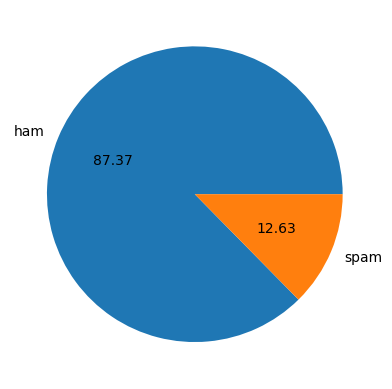

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [20]:
#DATA is imbalanced

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\garvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['No. of characters'] = df['Text'].apply(len)

In [24]:
df.head()

,Target,Text,No. of characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#Number of Words
df['No. of words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,Target,Text,No. of characters,No. of words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['No. of sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,Target,Text,No. of characters,No. of words,No. of sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['No. of characters', 'No. of words', 'No. of sentences']].describe()

,No. of characters,No. of words,No. of sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
#ham 
df[df['Target'] == 0][['No. of characters', 'No. of words', 'No. of sentences']].describe()

,No. of characters,No. of words,No. of sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#spam
df[df['Target'] == 1][['No. of characters', 'No. of words', 'No. of sentences']].describe()

,No. of characters,No. of words,No. of sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
import seaborn as sns

<Axes: xlabel='No. of characters', ylabel='Count'>

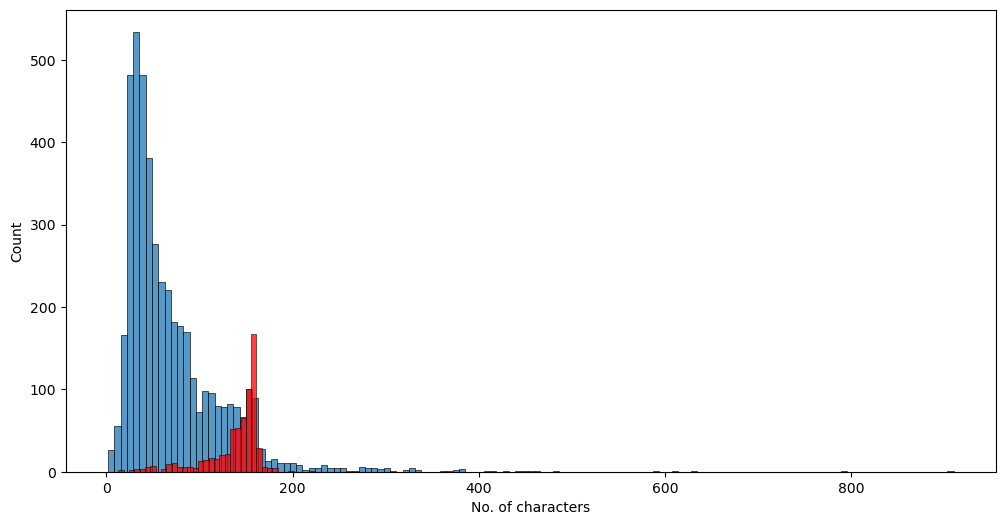

In [33]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['Target'] == 0]['No. of characters'])
sns.histplot(df[df['Target'] == 1]['No. of characters'], color = 'red')

<Axes: xlabel='No. of words', ylabel='Count'>

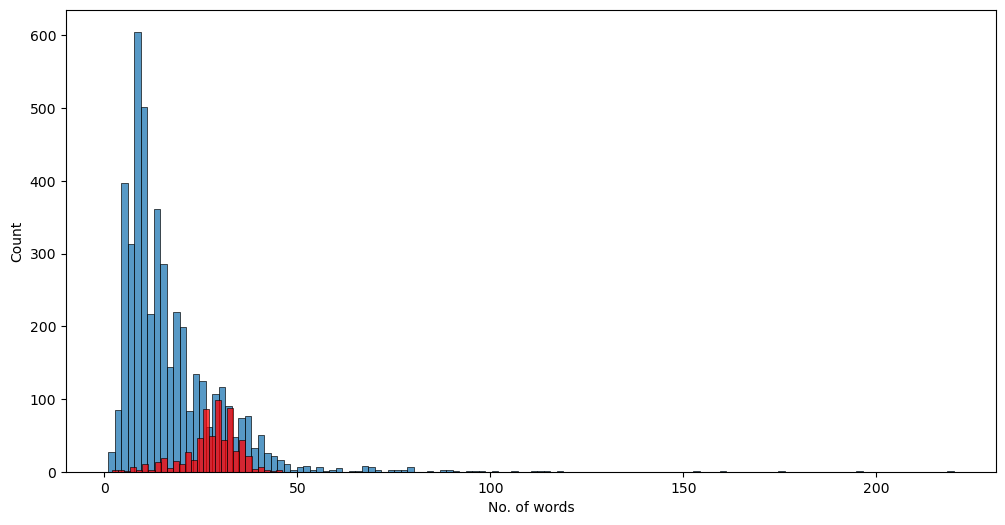

In [34]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['Target'] == 0]['No. of words'])
sns.histplot(df[df['Target'] == 1]['No. of words'], color = 'red')

<Axes: xlabel='No. of sentences', ylabel='Count'>

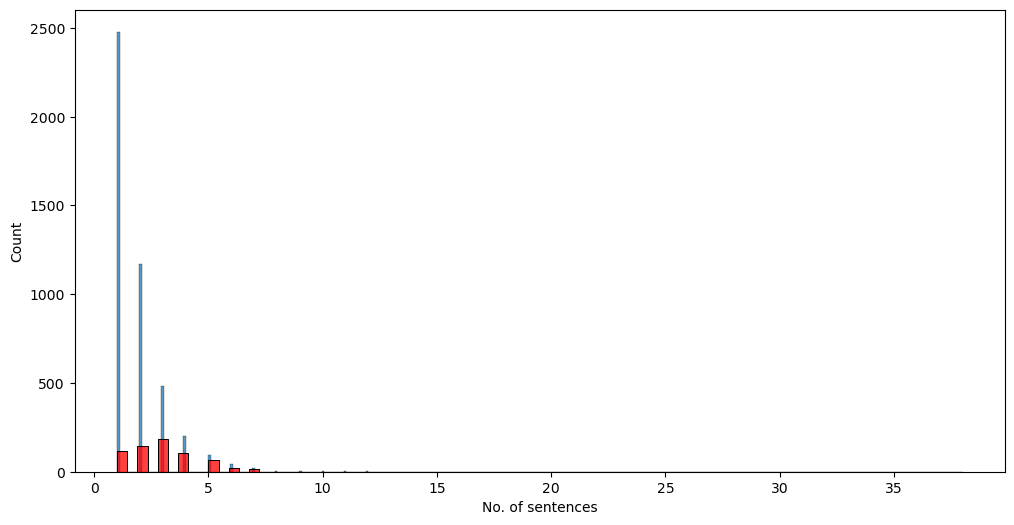

In [35]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['Target'] == 0]['No. of sentences'])
sns.histplot(df[df['Target'] == 1]['No. of sentences'], color = 'red')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


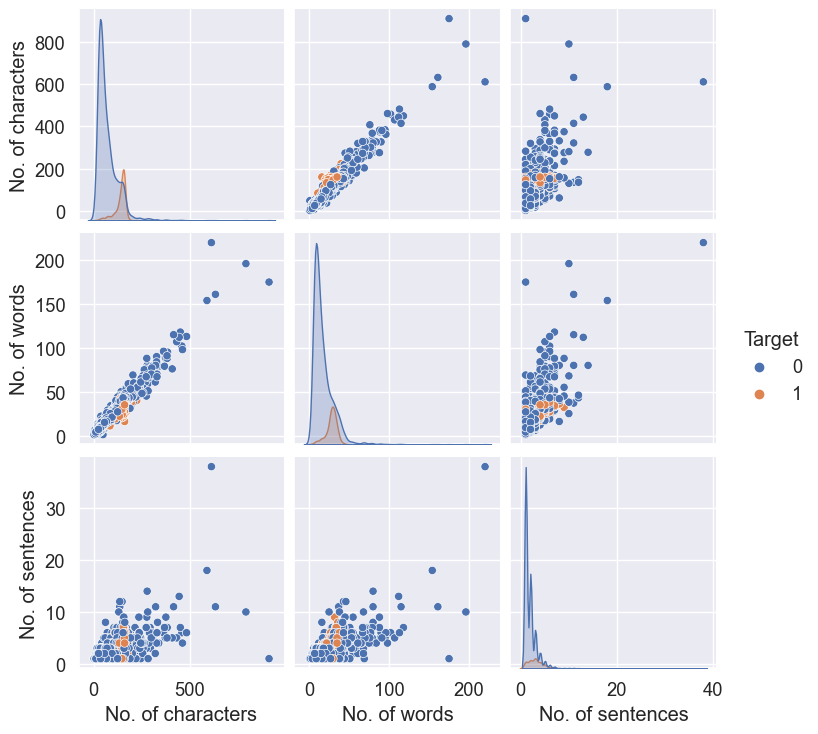

In [125]:
# relationships b/w columns
sns.pairplot(df,hue='Target')

In [37]:
print(df.dtypes)

Target                int32
Text                 object
No. of characters     int64
No. of words          int64
No. of sentences      int64
dtype: object


In [38]:
numeric_columns = df.select_dtypes(include=['float64', 'int64','int32']).columns
correlation_matrix = df[numeric_columns].corr()

<Axes: >

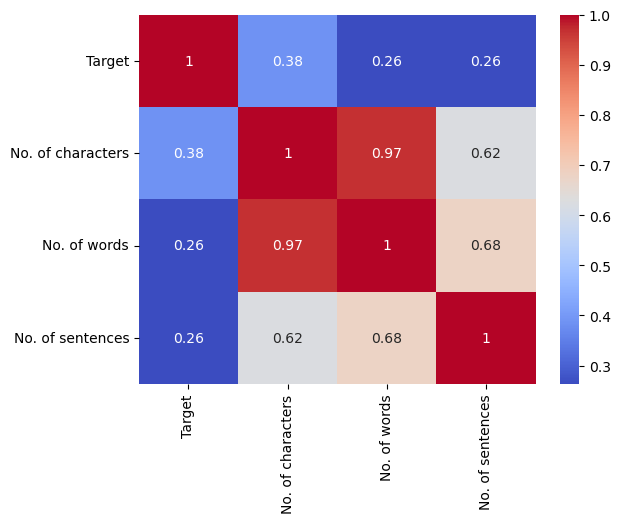

In [39]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

### Data Preprocessing

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\garvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [44]:
ps.stem('loving')

'love'

In [45]:
# creating function which perform all processes
def transform_text(Text):
    Text = Text.lower()
    Text = nltk.word_tokenize(Text)
    
    y=[]
    for i in Text:
        if i.isalnum():
            y.append(i)
            
    Text = y[:]
    y.clear()
    
    for i in Text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    Text = y[:]
    y.clear()
    
    for i in Text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [46]:
transform_text('This is the trial of spam classification using machine learning for the college project that has to be submitted by tomorrow')

'trial spam classif use machin learn colleg project submit tomorrow'

In [47]:
df['Transformed_text'] = df['Text'].apply(transform_text)

In [48]:
df.head()

,Target,Text,No. of characters,No. of words,No. of sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
from wordcloud import WordCloud

In [50]:
wc = WordCloud(width=800, height=400, min_font_size=10, background_color = 'black')

In [51]:
spam_wc = wc.generate(df[df['Target'] == 1]['Transformed_text'].str.cat(sep=" "))

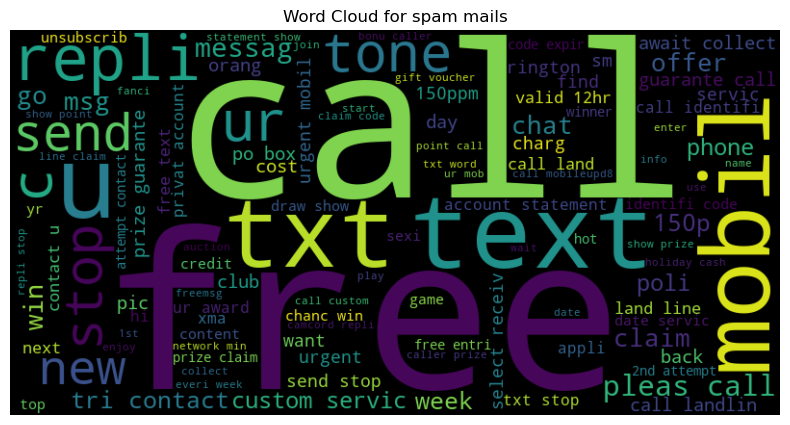

In [52]:
plt.figure(figsize = (10,5))
plt.imshow(spam_wc, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for spam mails')
plt.show()

In [53]:
ham_wc = wc.generate(df[df['Target'] == 0]['Transformed_text'].str.cat(sep=" "))

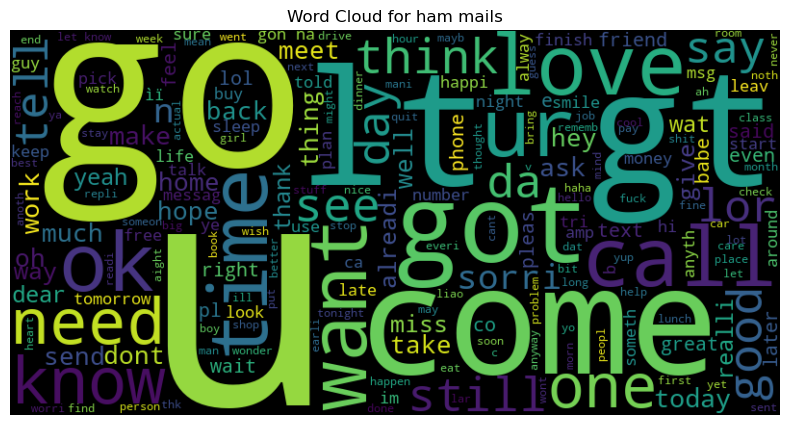

In [54]:
plt.figure(figsize = (10,5))
plt.imshow(ham_wc, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for ham mails')
plt.show()

In [55]:
df.head()

,Target,Text,No. of characters,No. of words,No. of sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [56]:
#Top words for spam messages 
spam_corpus = []
for msg in df[df['Target']==1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [57]:
len(spam_corpus)

9939

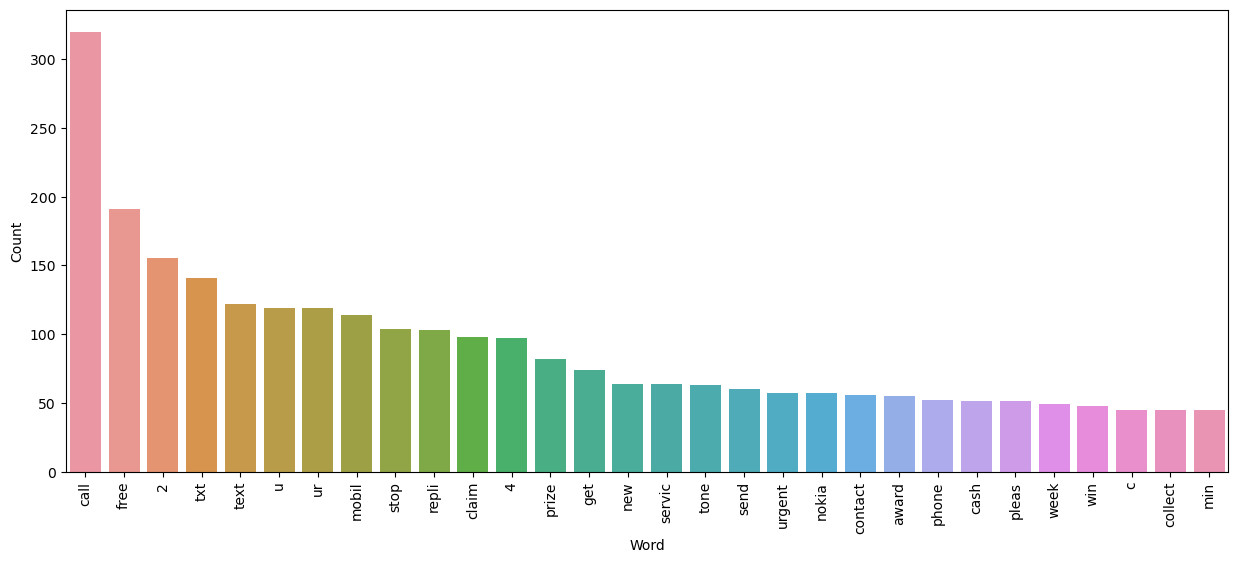

In [58]:
from collections import Counter
df_counter = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])

plt.figure(figsize = (15,6))
sns.barplot(x='Word', y='Count', data=df_counter)
plt.xticks(rotation='vertical')
plt.show()

In [59]:
#Top words for ham messages 
ham_corpus = []
for msg in df[df['Target']==0]['Transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [60]:
len(ham_corpus)

35404

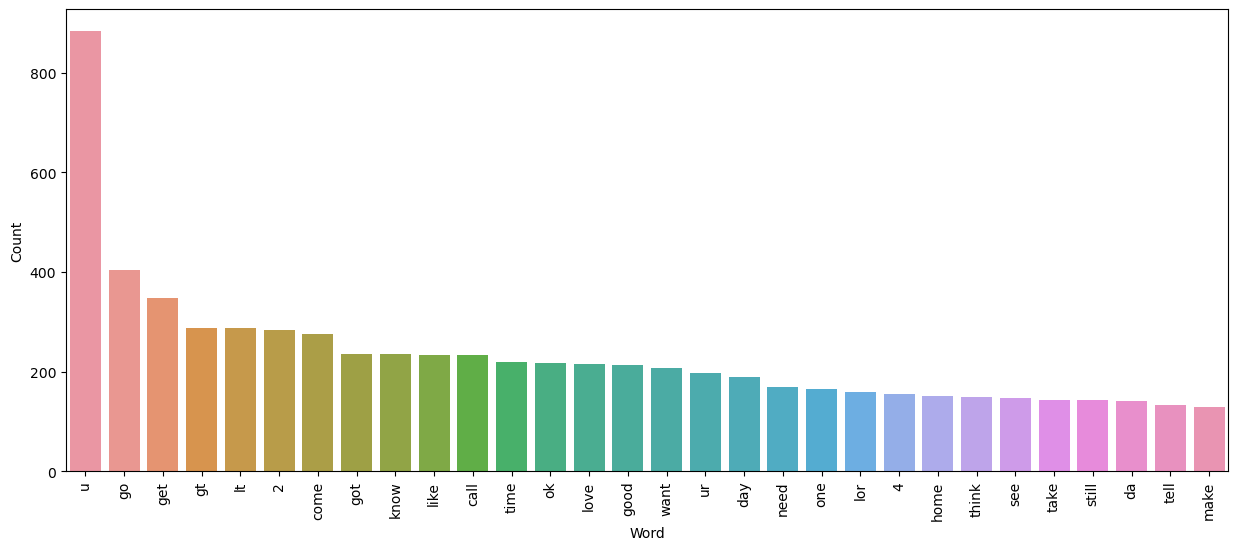

In [61]:
from collections import Counter
df_counter1 = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])

plt.figure(figsize = (15,6))
sns.barplot(x='Word', y='Count', data=df_counter1)
plt.xticks(rotation='vertical')
plt.show()

### MODEL BUILDING

In [62]:
# NAIVE BAYES USING BAG OF WORDS
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [63]:
X = cv.fit_transform(df['Transformed_text']).toarray()

In [64]:
X.shape

(5169, 6708)

In [65]:
y = df['Target'].values

In [66]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [69]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [70]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

                    GAUSSIAN NAIVE BAYES using BAG OF COUNT

Accuracy Score :  0.8800773694390716
Precision Score :  0.5315315315315315
Confusion Matrix : 
[[792 104]
 [ 20 118]] 



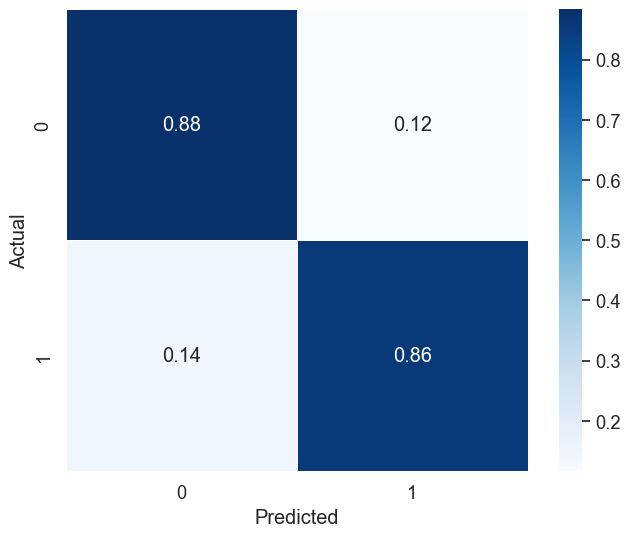

In [71]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('                    GAUSSIAN NAIVE BAYES using BAG OF COUNT')
print('\nAccuracy Score : ', accuracy_score(y_test,y_pred1))
print('Precision Score : ', precision_score(y_test,y_pred1))
print('Confusion Matrix : ')
print(confusion_matrix(y_test,y_pred1),'\n')

cm = confusion_matrix(y_test, y_pred1)
cm_normalised = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)

sns.heatmap(cm_normalised, annot=True, cmap='Blues', fmt='.2f', linewidth=.5, square=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

                    MULTINOMIAL NAIVE BAYES using BAG OF COUNT

Accuracy Score :  0.9642166344294004
Precision Score :  0.8344370860927153
Confusion Matrix : 
[[871  25]
 [ 12 126]] 



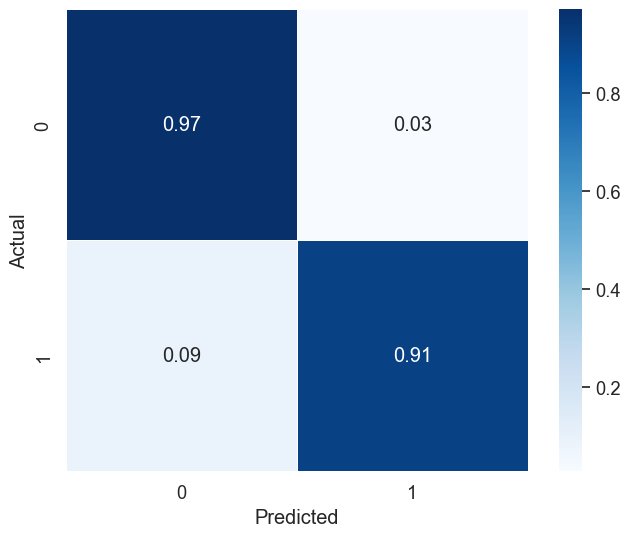

In [72]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print('                    MULTINOMIAL NAIVE BAYES using BAG OF COUNT')
print('\nAccuracy Score : ', accuracy_score(y_test,y_pred2))
print('Precision Score : ', precision_score(y_test,y_pred2))
print('Confusion Matrix : ')
print(confusion_matrix(y_test,y_pred2),'\n')

cm2 = confusion_matrix(y_test, y_pred2)
cm2_normalised = cm2.astype('float')/cm2.sum(axis=1)[:, np.newaxis]

plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)

sns.heatmap(cm2_normalised, annot=True, cmap='Blues', fmt='.2f', linewidth=.5, square=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

                    BERNOLLI NAIVE BAYES using BAG OF COUNT

Accuracy Score :  0.9700193423597679
Precision Score :  0.9734513274336283
Confusion Matrix : 
[[893   3]
 [ 28 110]] 



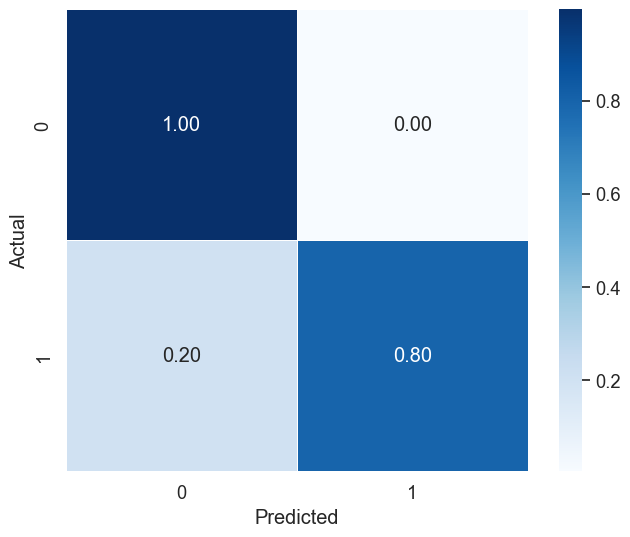

In [73]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print('                    BERNOLLI NAIVE BAYES using BAG OF COUNT')
print('\nAccuracy Score : ', accuracy_score(y_test,y_pred3))
print('Precision Score : ', precision_score(y_test,y_pred3))
print('Confusion Matrix : ')
print(confusion_matrix(y_test,y_pred3),'\n')

cm3 = confusion_matrix(y_test, y_pred3)
cm3_normalised = cm3.astype('float')/cm3.sum(axis=1)[:, np.newaxis]

plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)

sns.heatmap(cm3_normalised, annot=True, cmap='Blues', fmt='.2f', linewidth=.5, square=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [74]:
# NAIVE BAYES USING TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [75]:
X2 = tfidf.fit_transform(df['Transformed_text']).toarray()

In [76]:
X2.shape

(5169, 6708)

In [77]:
y2 = df['Target'].values

In [78]:
y2

array([0, 0, 1, ..., 0, 0, 0])

In [79]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2, random_state=2)

                    GAUSSIAN NAIVE BAYES using tfidf

Accuracy Score :  0.8762088974854932
Precision Score :  0.5231481481481481
Confusion Matrix : 
[[793 103]
 [ 25 113]] 



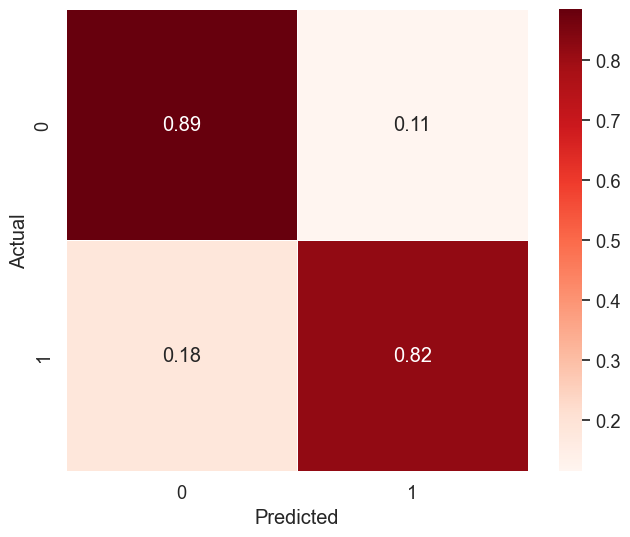

In [80]:
gnb.fit(X2_train,y2_train)
y_pred4 = gnb.predict(X2_test)
print('                    GAUSSIAN NAIVE BAYES using tfidf')
print('\nAccuracy Score : ', accuracy_score(y2_test,y_pred4))
print('Precision Score : ', precision_score(y2_test,y_pred4))
print('Confusion Matrix : ')
print(confusion_matrix(y2_test,y_pred4),'\n')

cm4 = confusion_matrix(y2_test, y_pred4)
cm4_normalised = cm4.astype('float')/cm4.sum(axis=1)[:, np.newaxis]

plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)

sns.heatmap(cm4_normalised, annot=True, cmap='Reds', fmt='.2f', linewidth=.5, square=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

                    MULTINOMIAL NAIVE BAYES using tdidf

Accuracy Score :  0.9593810444874274
Precision Score :  1.0
Confusion Matrix : 
[[896   0]
 [ 42  96]] 



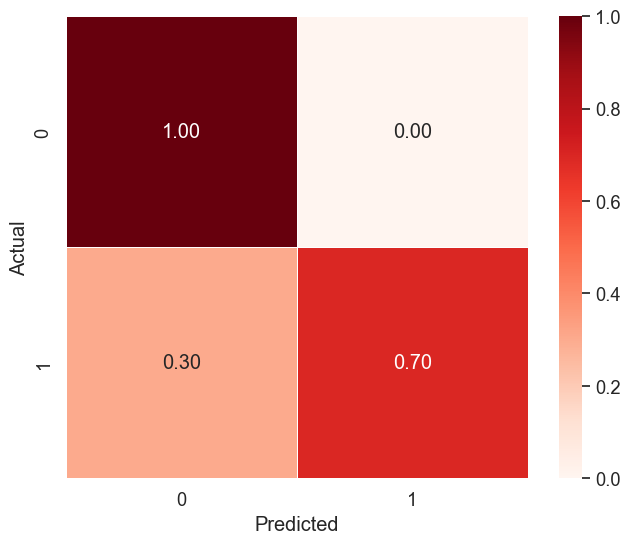

In [81]:
mnb.fit(X2_train,y2_train)
y_pred5 = mnb.predict(X2_test)
print('                    MULTINOMIAL NAIVE BAYES using tdidf')
print('\nAccuracy Score : ', accuracy_score(y2_test,y_pred5))
print('Precision Score : ', precision_score(y2_test,y_pred5))
print('Confusion Matrix : ')
print(confusion_matrix(y2_test,y_pred5),'\n')

cm5 = confusion_matrix(y2_test, y_pred5)
cm5_normalised = cm5.astype('float')/cm5.sum(axis=1)[:, np.newaxis]

plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)

sns.heatmap(cm5_normalised, annot=True, cmap='Reds', fmt='.2f', linewidth=.5, square=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

                    BERNOLLI NAIVE BAYES using tfidf

Accuracy Score :  0.9700193423597679
Precision Score :  0.9734513274336283
Confusion Matrix : 
[[893   3]
 [ 28 110]] 



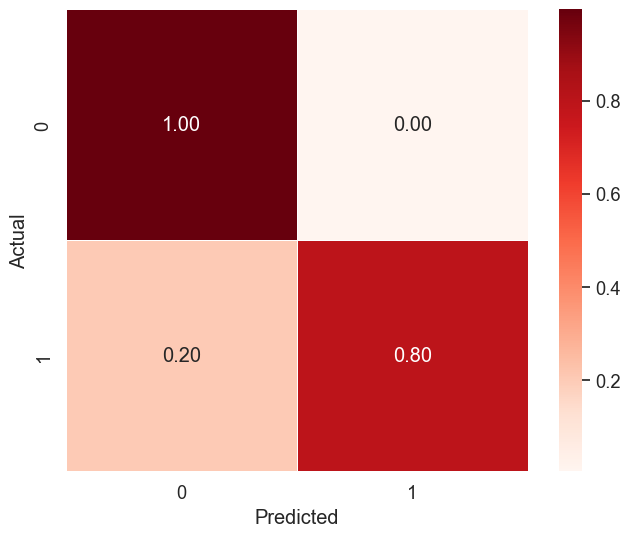

In [82]:
bnb.fit(X2_train,y2_train)
y_pred6 = bnb.predict(X2_test)
print('                    BERNOLLI NAIVE BAYES using tfidf')
print('\nAccuracy Score : ', accuracy_score(y2_test,y_pred6))
print('Precision Score : ', precision_score(y2_test,y_pred6))
print('Confusion Matrix : ')
print(confusion_matrix(y2_test,y_pred6),'\n')

cm6 = confusion_matrix(y2_test, y_pred6)
cm6_normalised = cm6.astype('float')/cm6.sum(axis=1)[:, np.newaxis]

plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)

sns.heatmap(cm6_normalised, annot=True, cmap='Reds', fmt='.2f', linewidth=.5, square=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [83]:
# TFIDF MNB (as precision score is highest)

In [84]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
from xgboost import XGBClassifier

In [87]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gdbt =  GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [88]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'ABC' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GDBT' :  gdbt,
    'XGB' : xgb 
}

In [89]:
def train_classifier(clf, X2_train, y2_train, X2_test, y2_test):
    clf.fit(X2_train,y2_train)
    y_predict = clf.predict(X2_test)
    accuracy = accuracy_score(y2_test, y_predict)
    precision = precision_score(y2_test,y_predict)
    
    return accuracy,precision

In [90]:
train_classifier(svc, X2_train, y2_train, X2_test, y2_test)

(0.9729206963249516, 0.9741379310344828)

In [91]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X2_train, y2_train, X2_test, y2_test)
    
    print("For ",name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  ABC
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GDBT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  XGB
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [92]:
#Sorting diff. algos acc. to their accuracy score
accuracy_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy' :accuracy_scores, 'Precision':precision_scores})
accuracy_df

,Algorithm,Accuracy,Precision
0,SVC,0.972921,0.974138
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
3,DT,0.935203,0.838095
4,LR,0.951644,0.940000
5,RF,0.971954,1.000000
6,ABC,0.961315,0.945455
7,BgC,0.958414,0.862595
8,ETC,0.972921,0.982456
9,GDBT,0.952611,0.923810


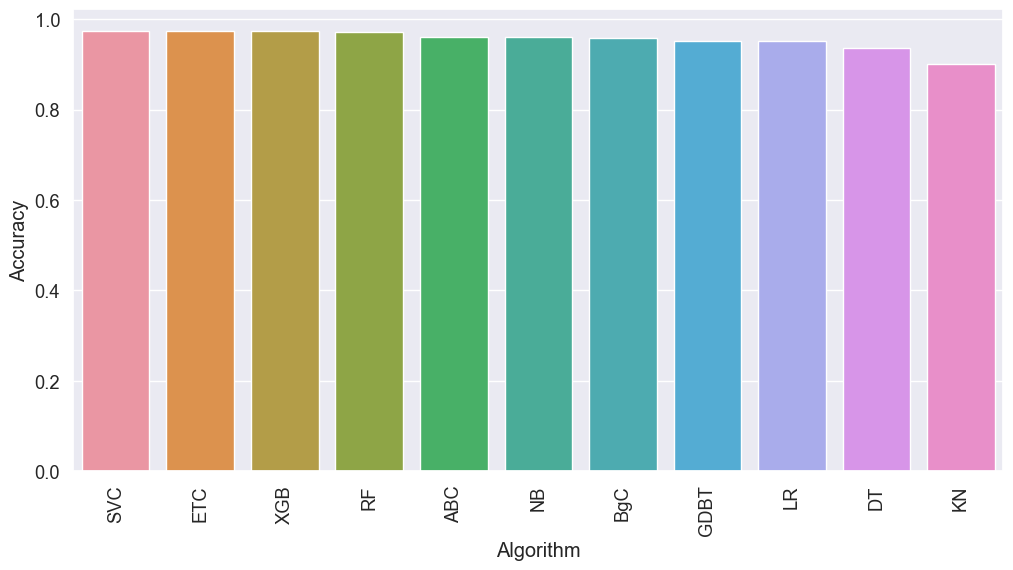

In [93]:
accuracy_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy' :accuracy_scores, 'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

plt.figure(figsize = (12,6))
sns.barplot(x='Algorithm', y='Accuracy', data=accuracy_df)
plt.xticks(rotation='vertical')
plt.show()

In [94]:
# Sortuing diff. algo. acc. to their precision score
precision_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy' :accuracy_scores, 'Precision':precision_scores})
precision_df

,Algorithm,Accuracy,Precision
0,SVC,0.972921,0.974138
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
3,DT,0.935203,0.838095
4,LR,0.951644,0.940000
5,RF,0.971954,1.000000
6,ABC,0.961315,0.945455
7,BgC,0.958414,0.862595
8,ETC,0.972921,0.982456
9,GDBT,0.952611,0.923810


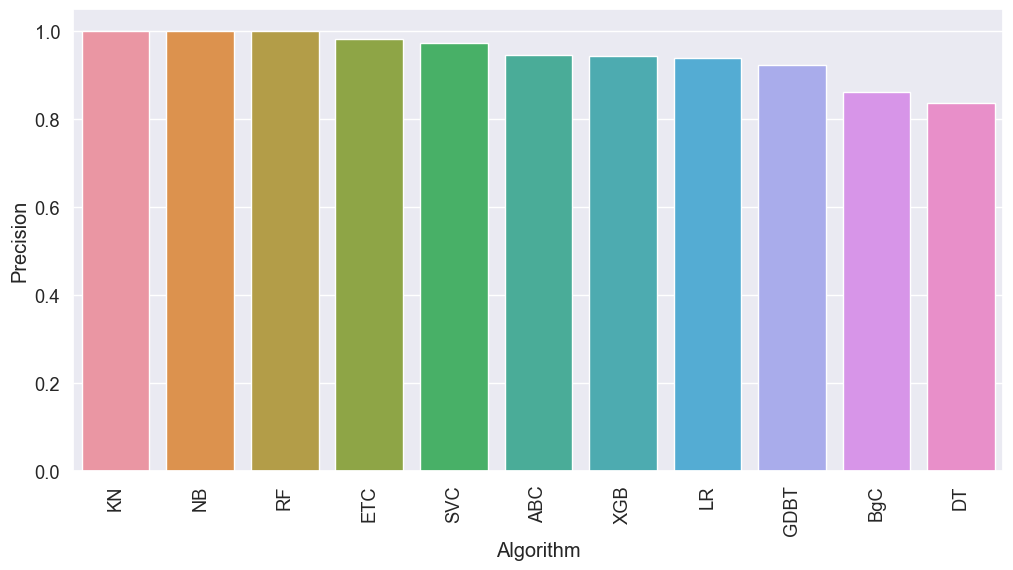

In [95]:
precision_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy' :accuracy_scores, 'Precision':precision_scores}).sort_values('Precision',ascending=False)

plt.figure(figsize = (12,6))
sns.barplot(x='Algorithm', y='Precision', data=precision_df)
plt.xticks(rotation='vertical')
plt.show()

In [96]:
performance_df = pd.melt(accuracy_df, id_vars = 'Algorithm')
performance_df

,Algorithm,variable,value
0,SVC,Accuracy,0.972921
1,ETC,Accuracy,0.972921
2,XGB,Accuracy,0.972921
3,RF,Accuracy,0.971954
4,ABC,Accuracy,0.961315
5,NB,Accuracy,0.959381
6,BgC,Accuracy,0.958414
7,GDBT,Accuracy,0.952611
8,LR,Accuracy,0.951644
9,DT,Accuracy,0.935203


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


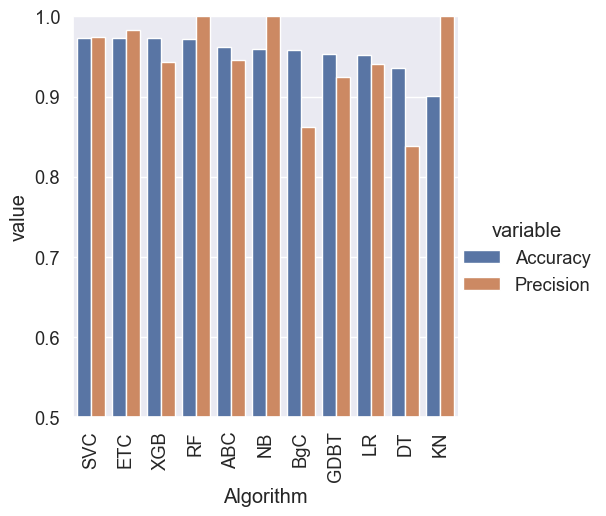

In [97]:
#Comparing accuracy and precision score of diff. algos
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df, kind='bar', height=5)

plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

### MODEL IMPROVE

In [98]:
# 1. change the max_features parameters of Tfidf 

In [99]:
# NAIVE BAYES USING TFIDF
tfidf = TfidfVectorizer(max_features = 3000)

In [100]:
X2 = tfidf.fit_transform(df['Transformed_text']).toarray()

In [101]:
'''
Implementing scaling to improve model
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X2 = scaler.fit_transform(X2)
'''
# After implementing scaling the precision of the 
# Naive bayes decreased by a significant amount
# therefore implementing scaling isn't improving
# the model. Hence we'll not integrate this in the
# model improvment

'\nImplementing scaling to improve model\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nX2 = scaler.fit_transform(X2)\n'

In [102]:
'''
appending the No. of character column to X

X2 = np.hstack((X2, df['No. of characters'].values.reshape(-1,1)))
'''
# This also doesn't gives a improvement. Hence we'll also not integrate it

"\nappending the No. of character column to X\n\nX2 = np.hstack((X2, df['No. of characters'].values.reshape(-1,1)))\n"

In [103]:
'''
Using Voting Classifier
from sklearn import VotingClassifier

voting = VotingClassifier(estimators=[('svm',svc), ('nb',mnb),('et',etc)],voting='soft')
voting.fit(X2_train, y2_train)

y_prediction = voting.predict(X2_test)
print('Accuracy : ', accuracy_score(y2_test,y_prediction))
print('Precision : ', precision_score(y2_test,y_prediction))
'''
# This was not also workingbetter than ETC
# Accuracy was increased but precision decreased

"\nUsing Voting Classifier\nfrom sklearn import VotingClassifier\n\nvoting = VotingClassifier(estimators=[('svm',svc), ('nb',mnb),('et',etc)],voting='soft')\nvoting.fit(X2_train, y2_train)\n\ny_prediction = voting.predict(X2_test)\nprint('Accuracy : ', accuracy_score(y2_test,y_prediction))\nprint('Precision : ', precision_score(y2_test,y_prediction))\n"

In [104]:
'''
Applying Stacking

estimators = [('svm',svc), ('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

from ensemble import StackingClassifier

clf.fit(X2_train,y2_train)
y_prediction1 = clf.predict(X2_test)
print('Accuracy : ', accuracy_score(y2_test,y_prediction1))
print('Precision : ', precision_score(y2_test,y_prediction1))
'''
# Here also the precision and accuracy both decrased

"\nApplying Stacking\n\nestimators = [('svm',svc), ('nb',mnb),('et',etc)]\nfinal_estimator = RandomForestClassifier()\n\nfrom ensemble import StackingClassifier\n\nclf.fit(X2_train,y2_train)\ny_prediction1 = clf.predict(X2_test)\nprint('Accuracy : ', accuracy_score(y2_test,y_prediction1))\nprint('Precision : ', precision_score(y2_test,y_prediction1))\n"

In [105]:
X2.shape

(5169, 3000)

In [106]:
y2 = df['Target'].values

In [107]:
y2

array([0, 0, 1, ..., 0, 0, 0])

In [108]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2, random_state=2)

                    GAUSSIAN NAIVE BAYES using tfidf

Accuracy Score :  0.8694390715667312
Precision Score :  0.5068493150684932
Confusion Matrix : 
[[788 108]
 [ 27 111]] 



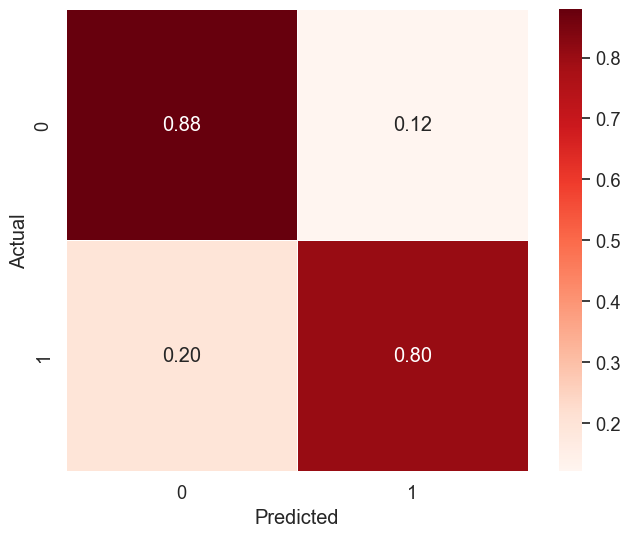

In [109]:
gnb.fit(X2_train,y2_train)
y_pred4 = gnb.predict(X2_test)
print('                    GAUSSIAN NAIVE BAYES using tfidf')
print('\nAccuracy Score : ', accuracy_score(y2_test,y_pred4))
print('Precision Score : ', precision_score(y2_test,y_pred4))
print('Confusion Matrix : ')
print(confusion_matrix(y2_test,y_pred4),'\n')

cm4 = confusion_matrix(y2_test, y_pred4)
cm4_normalised = cm4.astype('float')/cm4.sum(axis=1)[:, np.newaxis]

plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)

sns.heatmap(cm4_normalised, annot=True, cmap='Reds', fmt='.2f', linewidth=.5, square=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

                    MULTINOMIAL NAIVE BAYES using tdidf

Accuracy Score :  0.9709864603481625
Precision Score :  1.0
Confusion Matrix : 
[[896   0]
 [ 30 108]] 



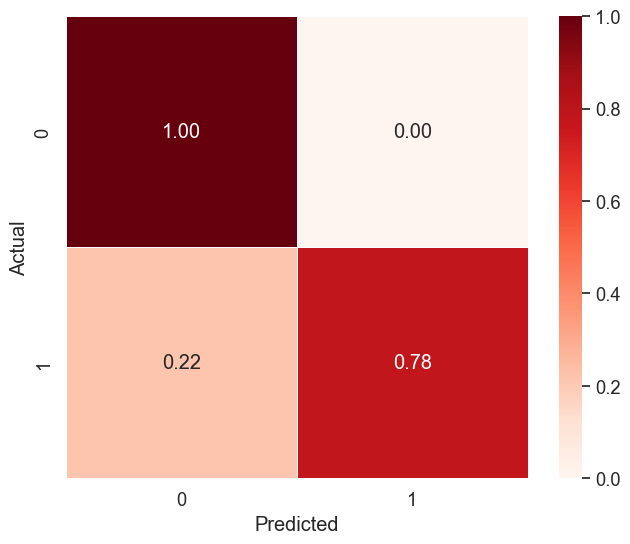

In [110]:
mnb.fit(X2_train,y2_train)
y_pred5 = mnb.predict(X2_test)
print('                    MULTINOMIAL NAIVE BAYES using tdidf')
print('\nAccuracy Score : ', accuracy_score(y2_test,y_pred5))
print('Precision Score : ', precision_score(y2_test,y_pred5))
print('Confusion Matrix : ')
print(confusion_matrix(y2_test,y_pred5),'\n')

cm5 = confusion_matrix(y2_test, y_pred5)
cm5_normalised = cm5.astype('float')/cm5.sum(axis=1)[:, np.newaxis]

plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)

sns.heatmap(cm5_normalised, annot=True, cmap='Reds', fmt='.2f', linewidth=.5, square=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

                    BERNOLLI NAIVE BAYES using tfidf

Accuracy Score :  0.9835589941972921
Precision Score :  0.991869918699187
Confusion Matrix : 
[[895   1]
 [ 16 122]] 



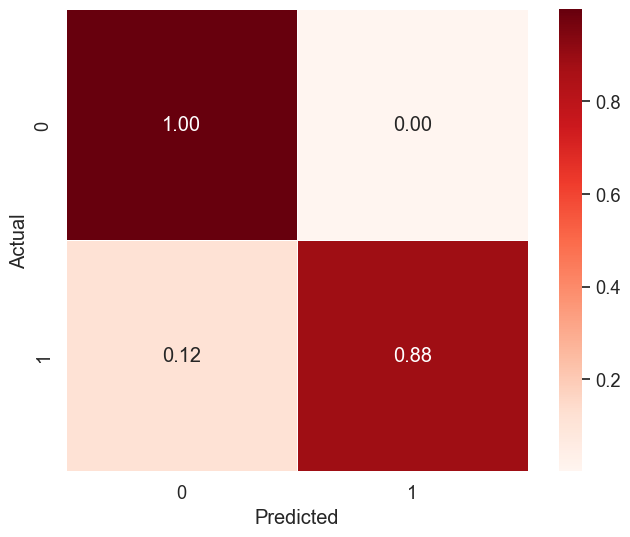

In [111]:
bnb.fit(X2_train,y2_train)
y_pred6 = bnb.predict(X2_test)
print('                    BERNOLLI NAIVE BAYES using tfidf')
print('\nAccuracy Score : ', accuracy_score(y2_test,y_pred6))
print('Precision Score : ', precision_score(y2_test,y_pred6))
print('Confusion Matrix : ')
print(confusion_matrix(y2_test,y_pred6),'\n')

cm6 = confusion_matrix(y2_test, y_pred6)
cm6_normalised = cm6.astype('float')/cm6.sum(axis=1)[:, np.newaxis]

plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)

sns.heatmap(cm6_normalised, annot=True, cmap='Reds', fmt='.2f', linewidth=.5, square=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [112]:
train_classifier(svc, X2_train, y2_train, X2_test, y2_test)

(0.9758220502901354, 0.9747899159663865)

In [113]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X2_train, y2_train, X2_test, y2_test)
    
    print("For ",name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  ABC
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GDBT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  XGB
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [114]:
# Sorting algos after adding max_feature acc. to accuracy
accuracy_df1 = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_max_feature(3000)' :accuracy_scores, 'Precision_max_feature(3000)':precision_scores})
accuracy_df1

,Algorithm,Accuracy_max_feature(3000),Precision_max_feature(3000)
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
3,DT,0.929400,0.828283
4,LR,0.958414,0.970297
5,RF,0.975822,0.982906
6,ABC,0.960348,0.929204
7,BgC,0.958414,0.868217
8,ETC,0.974855,0.974576
9,GDBT,0.946809,0.919192


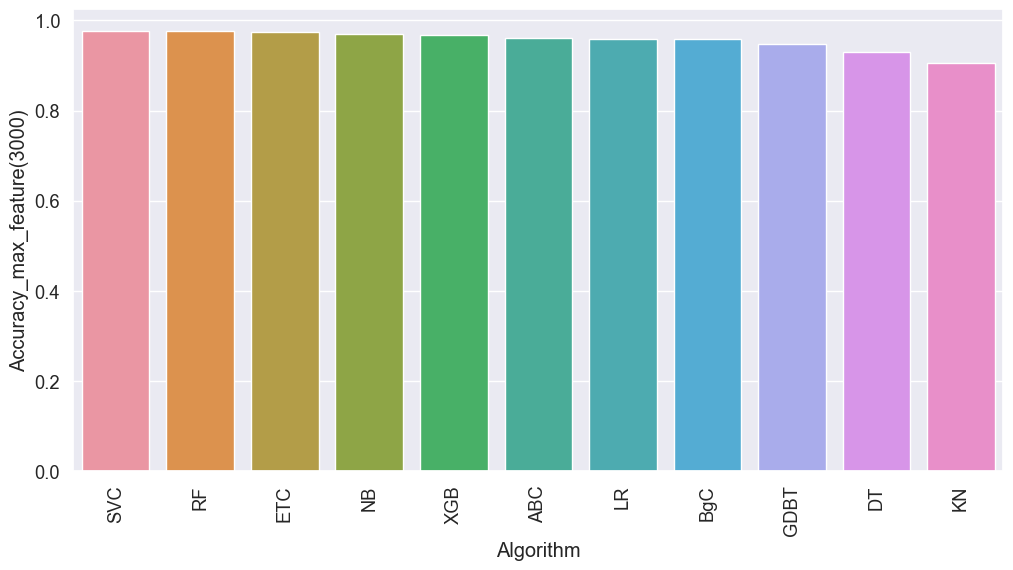

In [115]:
accuracy_df1 = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_max_feature(3000)' :accuracy_scores, 'Precision_max_feature(3000)':precision_scores}).sort_values('Accuracy_max_feature(3000)',ascending=False)

plt.figure(figsize = (12,6))
sns.barplot(x='Algorithm', y='Accuracy_max_feature(3000)', data=accuracy_df1)
plt.xticks(rotation='vertical')
plt.show()

In [116]:
# Sorting algos after adding max_feature acc. to precision
precision_df1 = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_max_feature(3000)' :accuracy_scores, 'Precision_max_feature(3000)':precision_scores})
precision_df1

,Algorithm,Accuracy_max_feature(3000),Precision_max_feature(3000)
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
3,DT,0.929400,0.828283
4,LR,0.958414,0.970297
5,RF,0.975822,0.982906
6,ABC,0.960348,0.929204
7,BgC,0.958414,0.868217
8,ETC,0.974855,0.974576
9,GDBT,0.946809,0.919192


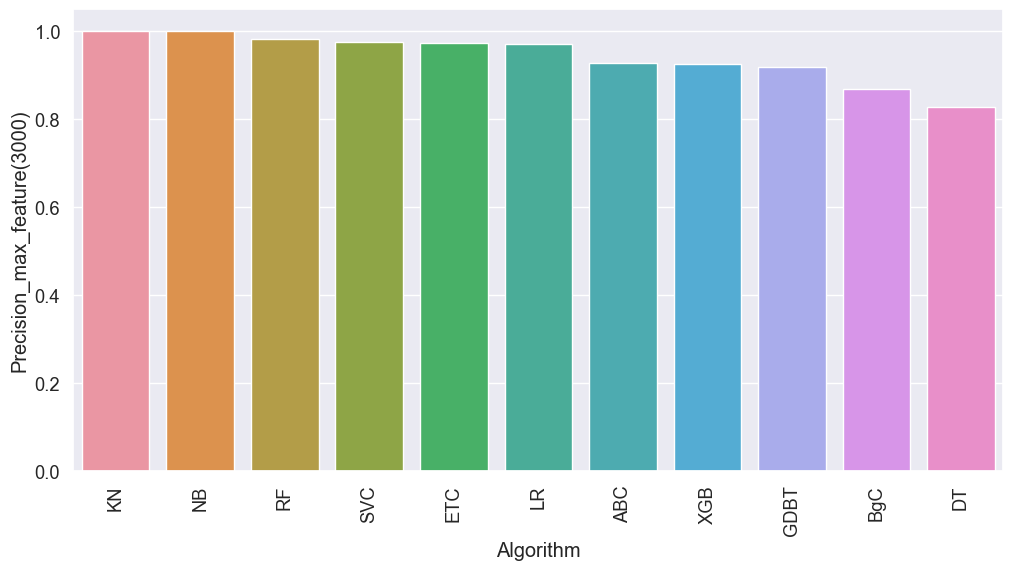

In [117]:
precision_df1 = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_max_feature(3000)' :accuracy_scores, 'Precision_max_feature(3000)':precision_scores}).sort_values('Precision_max_feature(3000)',ascending=False)

plt.figure(figsize = (12,6))
sns.barplot(x='Algorithm', y='Precision_max_feature(3000)', data=precision_df1)
plt.xticks(rotation='vertical')
plt.show()

In [118]:
performance_df1 = pd.melt(accuracy_df1, id_vars = 'Algorithm')
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy_max_feature(3000),0.975822
1,RF,Accuracy_max_feature(3000),0.975822
2,ETC,Accuracy_max_feature(3000),0.974855
3,NB,Accuracy_max_feature(3000),0.970986
4,XGB,Accuracy_max_feature(3000),0.967118
5,ABC,Accuracy_max_feature(3000),0.960348
6,LR,Accuracy_max_feature(3000),0.958414
7,BgC,Accuracy_max_feature(3000),0.958414
8,GDBT,Accuracy_max_feature(3000),0.946809
9,DT,Accuracy_max_feature(3000),0.929400


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


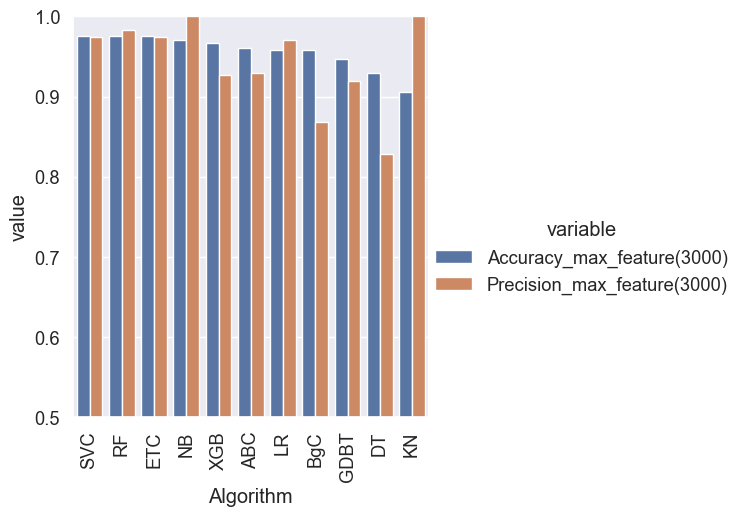

In [119]:
# Comparing diff. algos accuracy and pre=cision score after max_feature
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)

plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [120]:
# Comparison b/w before and after model improvements acc. to precision
precision_df.merge(precision_df1, on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_feature(3000),Precision_max_feature(3000)
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,ABC,0.961315,0.945455,0.960348,0.929204
6,XGB,0.972921,0.943548,0.967118,0.926230
7,LR,0.951644,0.940000,0.958414,0.970297
8,GDBT,0.952611,0.923810,0.946809,0.919192
9,BgC,0.958414,0.862595,0.958414,0.868217


In [121]:
# Comparison b/w before and after model improvements acc. to accuracy
accuracy_df.merge(accuracy_df1, on='Algorithm').sort_values('Precision',ascending=False )

,Algorithm,Accuracy,Precision,Accuracy_max_feature(3000),Precision_max_feature(3000)
3,RF,0.971954,1.000000,0.975822,0.982906
5,NB,0.959381,1.000000,0.970986,1.000000
10,KN,0.900387,1.000000,0.905222,1.000000
1,ETC,0.972921,0.982456,0.974855,0.974576
0,SVC,0.972921,0.974138,0.975822,0.974790
4,ABC,0.961315,0.945455,0.960348,0.929204
2,XGB,0.972921,0.943548,0.967118,0.926230
8,LR,0.951644,0.940000,0.958414,0.970297
7,GDBT,0.952611,0.923810,0.946809,0.919192
6,BgC,0.958414,0.862595,0.958414,0.868217


### Predicting spam or not spam on MNB Model.

In [122]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))

In [123]:
import joblib

In [124]:
# Save the Multinomial Naive Bayes model by tfidf vector after max depth 3000
model_save_path = r'C:\Users\garvi\Spam Classifier\model.pkl'
joblib.dump(mnb, model_save_path)
print(f"Multinomial Naive Bayes model saved to {model_save_path}")

# Save the vectorizer(tfidf)
vectorizer_save_path = r'C:\Users\garvi\Spam Classifier\vectorizer.pkl'
joblib.dump(tfidf, vectorizer_save_path)
print(f"Vectorizer saved to {vectorizer_save_path}")

# Load the Multinomial naive bayes model and the saved vectorizer
loaded_mnb_model = joblib.load(model_save_path)
loaded_tfidf = joblib.load(vectorizer_save_path)
print("Model and vectorizer loaded successfully.")

# User input
user_input = input("Enter the text to classify: ")

# Preprocess and vectorize the input
cleaned_input = transform_text(user_input)
vectorized_input = loaded_tfidf.transform([cleaned_input])

# Make predictions
prediction = loaded_mnb_model.predict(vectorized_input)

# Interpret the result
if prediction == 0:
    result = "not spam"
else:
    result = "spam"

print(f"The input sms is classified as: {result}")

Multinomial Naive Bayes model saved to C:\Users\garvi\Spam Classifier\model.pkl
Vectorizer saved to C:\Users\garvi\Spam Classifier\vectorizer.pkl
Model and vectorizer loaded successfully.
Enter the text to classify: get this for $100 and get more exclusive prize on other items. rate us
The input sms is classified as: spam
